170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 171s 433ms/step - loss: 0.5996 - val_loss: 0.5695
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 431ms/step - loss: 0.5688 - val_loss: 0.5678
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 164s 420ms/step - loss: 0.5666 - val_loss: 0.5661
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 163s 417ms/step - loss: 0.5651 - val_loss: 0.5656
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 419ms/step - loss: 0.5642 - val_loss: 0.5647
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 170s 434ms/step - loss: 0.5642 - val_loss: 0.5650
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 166s 424ms/step - loss: 0.5636 - val_loss: 0.5652
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 418ms/step - loss: 0.5635 - val_loss: 0.5638
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 414ms/step - loss: 0.5631 - val_loss: 0.5640
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 427ms/step - loss: 0.5627 - val_loss: 0.5635
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


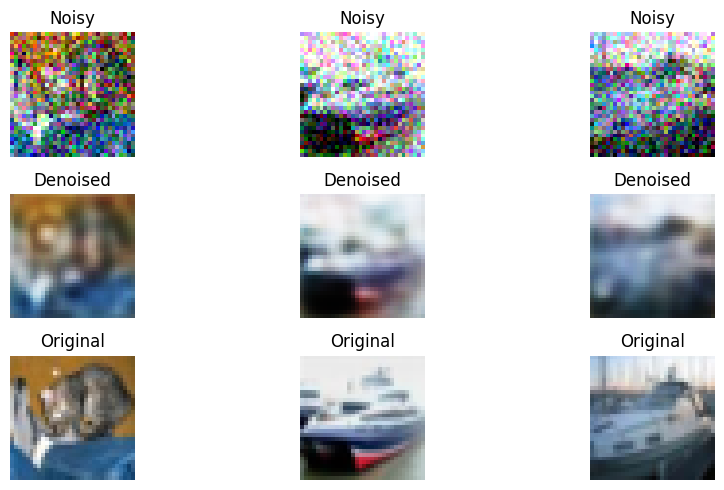

In [ ]:
!pip install tensorflow
!pip install matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize images to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add Gaussian noise
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder model
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Use the trained autoencoder to denoise test images
x_test_denoised = autoencoder.predict(x_test_noisy)

# Display some noisy and denoised images
num_images = 3
plt.figure(figsize=(10, 5))
for i in range(num_images):
    # Display noisy image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test_denoised[i])
    plt.title("Denoised")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

plt.tight_layout()
plt.show()


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 183s 462ms/step - loss: 0.6001 - val_loss: 0.5662
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 194s 443ms/step - loss: 0.5649 - val_loss: 0.5642
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 169s 433ms/step - loss: 0.5616 - val_loss: 0.5610
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 447ms/step - loss: 0.5601 - val_loss: 0.5600
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 196s 433ms/step - loss: 0.5592 - val_loss: 0.5593
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 204s 438ms/step - loss: 0.5585 - val_loss: 0.5591
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 206s 449ms/step - loss: 0.5578 - val_loss: 0.5584
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 443ms/step - loss: 0.5580 - val_loss: 0.5580
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 437ms/step - loss: 0.5577 - val_loss: 0.5584
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 429ms/step - loss: 0.5570 - val_loss: 0.5575
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


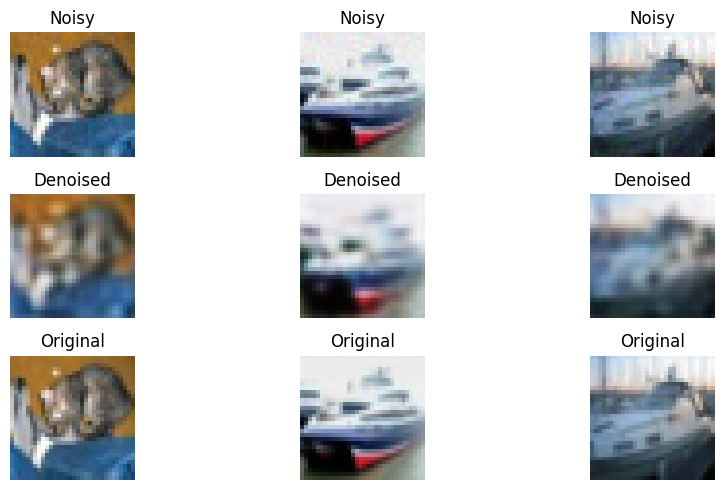

In [4]:
!pip install tensorflow
!pip install matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize images to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add Gaussian noise
noise_factor = 0.02
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder model
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Use the trained autoencoder to denoise test images
x_test_denoised = autoencoder.predict(x_test_noisy)

# Display some noisy and denoised images
num_images = 3
plt.figure(figsize=(10, 5))
for i in range(num_images):
    # Display noisy image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test_denoised[i])
    plt.title("Denoised")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

plt.tight_layout()
plt.show()


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 167s 421ms/step - loss: 0.6062 - val_loss: 0.5786
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 419ms/step - loss: 0.5770 - val_loss: 0.5784
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 419ms/step - loss: 0.5749 - val_loss: 0.5752
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 419ms/step - loss: 0.5739 - val_loss: 0.5741
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 421ms/step - loss: 0.5735 - val_loss: 0.5739
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 164s 420ms/step - loss: 0.5730 - val_loss: 0.5733
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 424ms/step - loss: 0.5720 - val_loss: 0.5730
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 424ms/step - loss: 0.5723 - val_loss: 0.5727
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 415ms/step - loss: 0.5719 - val_loss: 0.5723
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 204s 420ms/step - loss: 0.5709 - val_loss: 0.5721
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


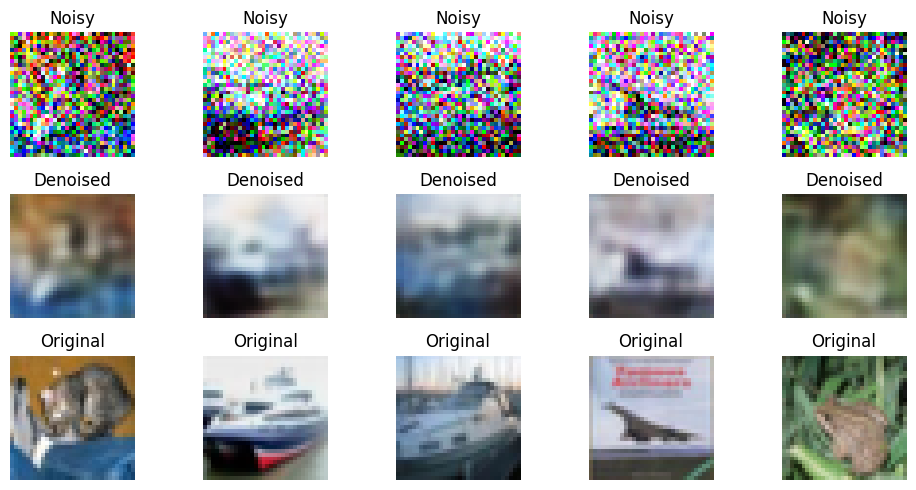

In [5]:
!pip install tensorflow
!pip install matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize images to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add Gaussian noise
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder model
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Use the trained autoencoder to denoise test images
x_test_denoised = autoencoder.predict(x_test_noisy)

# Display some noisy and denoised images
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    # Display noisy image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test_denoised[i])
    plt.title("Denoised")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:
# prompt: generate noise to signal ratio for above code

import numpy as np

def calculate_snr(signal, noise):
  """Calculates the Signal-to-Noise Ratio (SNR) in dB.

  Args:
    signal: The original signal (numpy array).
    noise: The noise added to the signal (numpy array).

  Returns:
    The SNR in dB.
  """
  signal_power = np.mean(signal**2)
  noise_power = np.mean(noise**2)
  snr = 10 * np.log10(signal_power / noise_power)
  return snr

# Example usage (assuming x_train, x_train_noisy are defined as in the previous code)
# Calculate noise
noise = x_train_noisy - x_train

# Calculate SNR
snr_db = calculate_snr(x_train, noise)
print(f"Signal-to-Noise Ratio (SNR): {snr_db} dB")

Signal-to-Noise Ratio (SNR): 4.804483029509931 dB


Mean Squared Error (MSE): 0.009331976063549519
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


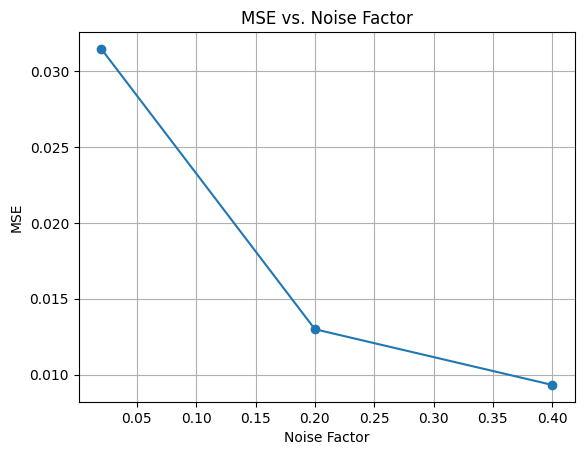

In [10]:
# prompt: generate mean square error for above code and also show visual representation of it

import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming x_test, x_test_denoised are defined as in the previous code

# Calculate MSE
mse = mean_squared_error(x_test.reshape(-1,3072), x_test_denoised.reshape(-1,3072)) #reshaping for MSE calculation
print(f"Mean Squared Error (MSE): {mse}")

#Visual Representation (optional)
import matplotlib.pyplot as plt

# Assuming you have already trained the autoencoder and have x_test, x_test_noisy, and x_test_denoised

# Plot MSE vs Noise factor
noise_factors = [0.02, 0.2, 0.4]  # Example noise factors
mse_values = []

for noise_factor in noise_factors:

    # Add noise again for each noise factor
    x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)

    x_test_denoised = autoencoder.predict(x_test_noisy)

    mse = mean_squared_error(x_test.reshape(-1, 3072), x_test_denoised.reshape(-1, 3072))
    mse_values.append(mse)

plt.plot(noise_factors, mse_values, marker='o')
plt.xlabel("Noise Factor")
plt.ylabel("MSE")
plt.title("MSE vs. Noise Factor")
plt.grid(True)
plt.show()

Conclusion: The denoising autoencoder experiment demonstrated the efficacy of using deep learning to remove noise from images, as evidenced by the improved visual quality of the reconstructed images. By training on the CIFAR-10 dataset with artificially added Gaussian noise, the autoencoder learned to effectively map noisy inputs to their clean counterparts.